In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install statsmodels==0.13.0
!pip install pmdarima

     |████████████████████████████████| 9.8 MB 6.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 8.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import missingno

import scipy as sp

# TIME SERIES
from statsmodels.tsa.arima.model import ARIMA # v 0.13.0
#from statsmodels.tsa.arima_model import ARIMA #v 0.12.1
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf,arma_order_select_ic
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfs = tfp.stats

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

In [ ]:
import glob

#get all csv file names
filepath='Datafor555/IL'
all_files = glob.glob(filepath + "/*.csv")

#put all csv file names into a list
li = []
for filename in all_files:
    yr=filename[-6:-4]
    df_il = pd.read_csv(filename,encoding='latin-1')
    df_il['year']=yr
    li.append(df_il)

#concatenate all csv files into a dataframe
df_IL = pd.concat(li, axis=0)

# df.loc[:,['AverageTemp','YearlyPrecipiation','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048']]
df_IL_grouped_yearly=df_IL.groupby(['year']).mean()

df_IL_grouped_yearly

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,11,75,98,130) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,11,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,98,102,106,107,108,109,113,114,121,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,5,11,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,98,102,106,107,108,109,113,114,119,120,121,123,124,128,129,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/

,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,HISTORY_037,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,...,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,OPERATING_RATING_064,INVENTORY_RATING_066,POSTING_EVAL_070,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,STRAHNET_HIGHWAY_100,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUFFICIENCY_RATING,SUBMITTED_BY,LOWEST_RATING,DECK_AREA,CAT23,CAT29
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00,17.0,3.825746,1.096725,0.000068,4.628578,99.485969,38163.825746,86.425348,40.567208,0.226750,0.050164,3.999554e+07,8.864087e+07,8.727764,2.975505,3.032899,3.032899,9.221343,1962.837015,2.107733,0.884589,7922.089420,1996.471219,9.039189,0.122265,11.604109,0.017567,4.967022,0.079613,0.616548,1.390807,4.076408,3.314671,6.246891,0.102266,0.088039,2.312368,0.164967,13.943813,16.299028,...,8.253506,9.176355,98.597601,0.997780,0.887005,2.330170,45.281798,30.614856,4.729725,32.554266,1.001289,9.829463,662.237522,33.424572,613.364029,727.787879,453.218045,132.161712,33.321148,206.681048,1995.721442,268.172414,55.034483,0.110043,1.980533,0.190290,0.005021,227.321504,8.017056,0.124686,2.044776,5832.812116,2017.290274,0.050000,84.065633,NaN,NaN,NaN,NaN,NaN
01,17.0,3.828362,1.097560,0.000068,4.631863,99.457226,38148.926567,86.468514,40.544068,0.226427,0.050173,3.998639e+07,8.862699e+07,8.722420,2.975466,3.040727,3.040727,9.232074,1963.502032,2.111711,0.883064,7826.098884,1997.350428,9.030477,0.122846,11.649906,0.017701,4.966753,0.078940,0.613311,1.390784,4.082426,3.328424,6.265585,0.101425,0.085611,2.312759,0.165779,13.980975,16.336041,...,8.267459,9.196123,98.650818,0.993522,0.888377,2.320583,45.595091,30.826320,4.743499,32.587349,1.001291,9.891707,540.959495,33.627350,573.661145,687.553625,467.268116,140.382590,38.464079,228.912050,1996.123760,268.172414,55.034483,0.109742,1.977909,0.189691,0.005014,229.037242,9.289128,0.124198,2.060302,6480.062615,2019.450735,0.050000,84.452695,NaN,NaN,NaN,NaN,NaN
02,17.0,3.834252,1.096289,0.000068,4.632378,99.526480,38166.319654,86.499724,40.405726,0.226756,0.044774,3.298582e+04,7.564777e+04,8.650472,2.976689,3.041572,3.041572,9.256454,1964.320777,2.116437,0.880637,7987.587204,1998.614914,9.040045,0.122804,11.722968,0.017761,4.967640,0.078425,0.607682,1.389857,4.086139,3.343369,6.297919,0.101530,0.085575,2.311095,0.166654,14.011913,16.366052,...,8.294831,9.217594,98.670109,0.983837,0.878851,2.312995,45.896934,31.055007,4.764219,32.619321,1.001324,9.805833,523.531333,33.782410,552.171157,672.570661,464.622378,128.712467,16.991839,188.264027,1998.356563,268.172414,55.034483,0.107961,1.974591,0.188686,0.004998,231.024124,9.360411,0.124201,2.116162,6432.206969,2020.333424,0.050000,84.964437,NaN,NaN,NaN,NaN,NaN
03,17.0,3.839988,1.096440,0.000068,4.627353,99.496588,38184.233617,86.551167,40.561343,0.226986,0.053228,3.997108e+07,8.858718e+07,8.642515,2.976456,3.063272,3.063272,9.269423,1965.065677,2.121754,0.879949,8119.536482,1999.958215,

In [ ]:
d={'92':1992, '93':1993, '94':1994,'95':1995,'96':1996,'97':1997,'98':1998,'99':1999,'00':2000,'01':2001,'02':2002,'03':2003,'04':2004,'05':2005,'06':2006,'07':2007,'08':2008,'09':2009,'10':2010,'11':2011,'12':2012,'13':2013,'14':2014,'15':2015,'16':2016,'17':2017,'18':2018,'19':2019,'20':2020}
df_IL['year']=df_IL['year'].map(d)
df_IL

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29
0,17,1000200603,1,3,1,61,0,6.0,1.0,36295,BIG NECK CREEK,NaN,ILL61&94,.5 MI N JCT 61 94,99.99,NaN,NaN,NaN,NaN,40084200.0,91040000.0,0,3,1.0,1.0,6,1924.0,2.0,0,1200,1991.0,0,9.8,0.0,0.0,0.0,1,1,1,1,...,NaN,NaN,NaN,1991.0,1,1,0,0,20.0,0,NaN,Y,6,1680.0,2013.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,84.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,1000300604,1,3,1,61,0,6.0,1.0,36295,BIG NECK CREEK,NaN,ILL61,.1 MI W JCT 61&94,99.99,NaN,NaN,NaN,NaN,40080600.0,91041800.0,0,3,1.0,1.0,6,1925.0,2.0,0,650,1991.0,0,9.1,0.0,30.0,0.0,0,1,0,1,...,NaN,NaN,NaN,0.0,1,6,0,0,23.0,0,NaN,Y,6,1120.0,2013.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,84.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,1000400605,1,3,1,61,0,6.0,1.0,36295,BIG NECK CR,NaN,ILL61,1 MI W JCT61&94,99.99,NaN,NaN,NaN,NaN,40080600.0,91051800.0,0,3,1.0,1.0,6,1925.0,2.0,0,650,1991.0,0,9.1,0.0,45.0,0.0,0,0,1,0,...,NaN,NaN,NaN,0.0,1,6,0,0,23.0,0,NaN,Y,6,1190.0,2013.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,51.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,1000500606,1,3,1,61,0,6.0,1.0,39220,THURMAN CR,NaN,ILL61,.2 MI E LORAINE RD,99.99,NaN,NaN,NaN,NaN,40081800.0,91131200.0,0,3,1.0,1.0,6,1925.0,2.0,0,750,1991.0,0,9.1,0.0,0.0,0.0,0,0,1,0,...,NaN,NaN,NaN,0.0,1,6,0,0,20.0,0,NaN,Y,6,1050.0,2013.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,61.5,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,1000700608,1,3,1,96,0,6.0,1.0,77044,URSA CR,NaN,ILL96,SO EDGE URSA,99.99,NaN,NaN,NaN,NaN,40041200.0,91220000.0,0,3,1.0,1.0,6,1969.0,2.0,0,4750,1991.0,5,9.1,0.0,0.0,0.0,0,0,1,0,...,NaN,NaN,NaN,1990.0,1,6,1,0,8.0,0,NaN,Y,6,6413.0,2013.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,49.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29742,17,1.02006e+11,2,2,1,24,0,NaN,203.0,23737,US 24 & TP&W RR,NaN,I-39 US 51 SB,.5 MI W OF US 51,4.95,258.245,NaN,NaN,NaN,40441417.0,89020651.0,0,3,NaN,NaN,2,1989.0,3.0,2,9400,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29743,17,1.02006e+11,2,2,1,24,0,NaN,203.0,23737,US 24 & TP&W RR,NaN,I-39 US 51 NB,.5 MI W OF US 51,4.95,258.261,NaN,NaN,NaN,40441418.0,89020605.0,0,3,NaN,NaN,2,1989.0,3.0,2,9400,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,N

In [ ]:
weatherdata = pd.read_csv("Datafor555/avg_temp.IL.csv", index_col=False)
ILweather = weatherdata.loc[:,['year','avg_temp','avg_prcp','max_temp','min_temp']]
ILweather

,year,avg_temp,avg_prcp,max_temp,min_temp
0,1992,51.9,35.81,61.7,42.0
1,1993,50.9,51.18,60.0,41.7
2,1994,52.0,35.51,62.4,41.6
3,1995,51.6,38.91,61.8,41.4
4,1996,50.1,38.82,60.2,40.0
5,1997,51.0,35.10,60.7,41.2
6,1998,55.2,44.49,64.6,45.8
7,1999,53.5,35.71,64.3,42.8
8,2000,52.2,39.77,62.4,42.0
9,2001,53.4,39.65,63.7,43.1


In [ ]:
df1_IL=df_IL.merge(ILweather, left_index=False)
df1_IL

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29,avg_temp,avg_prcp,max_temp,min_temp
0,17,1000200603,1,3,1,61,0,6.0,1.0,36295,BIG NECK CREEK,NaN,ILL61&94,.5 MI N JCT 61 94,99.99,NaN,NaN,NaN,NaN,40084200.0,91040000.0,0,3,1.0,1.0,6,1924.0,2.0,0,1200,1991.0,0,9.8,0.0,0.0,0.0,1,1,1,1,...,1,1,0,0,20.0,0,NaN,Y,6,1680.0,2013.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,84.3,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9,35.81,61.7,42.0
1,17,1000300604,1,3,1,61,0,6.0,1.0,36295,BIG NECK CREEK,NaN,ILL61,.1 MI W JCT 61&94,99.99,NaN,NaN,NaN,NaN,40080600.0,91041800.0,0,3,1.0,1.0,6,1925.0,2.0,0,650,1991.0,0,9.1,0.0,30.0,0.0,0,1,0,1,...,1,6,0,0,23.0,0,NaN,Y,6,1120.0,2013.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,84.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9,35.81,61.7,42.0
2,17,1000400605,1,3,1,61,0,6.0,1.0,36295,BIG NECK CR,NaN,ILL61,1 MI W JCT61&94,99.99,NaN,NaN,NaN,NaN,40080600.0,91051800.0,0,3,1.0,1.0,6,1925.0,2.0,0,650,1991.0,0,9.1,0.0,45.0,0.0,0,0,1,0,...,1,6,0,0,23.0,0,NaN,Y,6,1190.0,2013.0,NaN,N,NaN,NaN,A,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,51.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9,35.81,61.7,42.0
3,17,1000500606,1,3,1,61,0,6.0,1.0,39220,THURMAN CR,NaN,ILL61,.2 MI E LORAINE RD,99.99,NaN,NaN,NaN,NaN,40081800.0,91131200.0,0,3,1.0,1.0,6,1925.0,2.0,0,750,1991.0,0,9.1,0.0,0.0,0.0,0,0,1,0,...,1,6,0,0,20.0,0,NaN,Y,6,1050.0,2013.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,61.5,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9,35.81,61.7,42.0
4,17,1000700608,1,3,1,96,0,6.0,1.0,77044,URSA CR,NaN,ILL96,SO EDGE URSA,99.99,NaN,NaN,NaN,NaN,40041200.0,91220000.0,0,3,1.0,1.0,6,1969.0,2.0,0,4750,1991.0,5,9.1,0.0,0.0,0.0,0,0,1,0,...,1,6,1,0,8.0,0,NaN,Y,6,6413.0,2013.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,49.8,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9,35.81,61.7,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822191,17,1.02006e+11,2,2,1,24,0,NaN,203.0,23737,US 24 & TP&W RR,NaN,I-39 US 51 SB,.5 MI W OF US 51,4.95,258.245,NaN,NaN,NaN,40441417.0,89020651.0,0,3,NaN,NaN,2,1989.0,3.0,2,9400,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.7,31.43,64.0,43.4
822192,17,1.02006e+11,2,2,1,24,0,NaN,203.0,23737,US 24 & TP&W RR,NaN,I-39 US 51 NB,.5 MI W OF US 51,4.95,258.261,NaN,NaN,NaN,40441418.0,89020605.0,0,3,NaN,NaN,2,1989.0,3.0,2,9400,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
df1_IL['Age_of_Bridge'] = df1_IL['year']-df1_IL['YEAR_BUILT_027']
df2_IL=df1_IL.loc[:,['avg_temp','avg_prcp','min_temp','max_temp','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048','MAIN_UNIT_SPANS_045','ROADWAY_WIDTH_MT_051','APPR_WIDTH_MT_032','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']]
df2_IL.dropna(inplace=True)
df3_IL=df2_IL[(df2_IL['SUBSTRUCTURE_COND_060']!='N') & (df2_IL['SUPERSTRUCTURE_COND_059']!='N') & (df2_IL['DECK_COND_058']!='N')]
for col in df3_IL:
  df3_IL[col]=df3_IL[col].astype(float)
df3_IL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,avg_temp,avg_prcp,min_temp,max_temp,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,51.9,35.81,42.0,61.7,68.0,2.0,1200.0,7.6,1.0,8.8,9.8,6.0,6.0,6.0
1,51.9,35.81,42.0,61.7,67.0,2.0,650.0,7.9,1.0,8.8,9.1,6.0,6.0,5.0
2,51.9,35.81,42.0,61.7,67.0,2.0,650.0,9.8,1.0,6.8,9.1,4.0,4.0,4.0
3,51.9,35.81,42.0,61.7,67.0,2.0,750.0,15.5,1.0,6.8,9.1,5.0,5.0,6.0
4,51.9,35.81,42.0,61.7,23.0,2.0,4750.0,12.8,2.0,9.2,9.1,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818254,53.7,31.43,43.4,64.0,4.0,2.0,50.0,22.8,6.0,8.2,8.2,8.0,8.0,7.0
818255,53.7,31.43,43.4,64.0,68.0,2.0,100.0,18.3,2.0,6.1,7.9,7.0,6.0,5.0
818256,53.7,31.43,43.4,64.0,65.0,2.0,100.0,33.5,3.0,8.5,7.3,6.0,6.0,6.0
818258,53.7,31.43,43.4,64.0,64.0,2.0,25.0,10.4,1.0,6.0,6.7,6.0,6.0,7.0


In [ ]:
# Separate the Feature data X from the response data y1,y2,y3
X=df3_IL.iloc[:,:-3] # All columns except for the last 3 columns
y1=df3_IL.iloc[:,-3] #The last column would be our response variable in our case, Deck Condition
y2=df3_IL.iloc[:,-2]  #The last column would be our response variable in our case, SuperStructure Condition
y3=df3_IL.iloc[:,-1]  #The last column would be our response variable in our case, Substructure Condition

For the Deck

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [13]:
pred=model.predict(X_test)
pred

array([8., 7., 7., ..., 6., 8., 8.])

In [14]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)

0.49989614290735945

In [15]:
# Print the accuracy score
print(f'the accuracy score value for the deck is {metrics.accuracy_score(y_test, pred)*100 :.2f}%')

the accuracy score value for the deck is 49.99%


For the SuperStructure

In [16]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X1_train,y1_train)

In [ ]:
model.best_estimator_

KNeighborsClassifier()

In [ ]:
pred=model.predict(X1_test)
pred

array([8., 8., 7., ..., 7., 8., 8.])

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y1_test, pred)

0.5055523599527051

In [ ]:
# Print the accuracy score
print(f'The accuracy score value for the Superstructure is {metrics.accuracy_score(y1_test, pred)*100 :.2f}%')

The accuracy score value for the Superstructure is 50.56%


For SubStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X2_train,y2_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [ ]:
pred=model.predict(X2_test)
pred

array([8., 7., 6., ..., 6., 8., 8.])

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y2_test, pred)

0.5220896047039274

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the Sub-Structure is {metrics.accuracy_score(y2_test, pred)*100 :.2f}%')

the accuracy score value for the Sub-Structure is 52.21%


Correlation

In [ ]:
#df3_IL.corr()

,avg_temp,avg_prcp,min_temp,max_temp,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
avg_temp,1.000000,-0.330834,0.966135,0.974975,0.011165,0.011584,-0.005987,0.011384,-0.000115,0.016033,-0.005893,0.011066,0.011017,0.022644
avg_prcp,-0.330834,1.000000,-0.154826,-0.453638,0.020042,0.010285,0.008890,0.013883,-0.000647,0.016679,0.002671,-0.025155,-0.017805,0.007017
min_temp,0.966135,-0.154826,1.000000,0.885496,0.013598,0.011396,-0.005814,0.012127,-0.000346,0.016420,-0.004398,0.002220,0.003573,0.018334
max_temp,0.974975,-0.453638,0.885496,1.000000,0.008523,0.011474,-0.005678,0.010403,0.000119,0.015275,-0.007209,0.019294,0.017943,0.026240
Age_of_Bridge,0.011165,0.020042,0.013598,0.008523,1.000000,-0.098884,0.039940,-0.092123,-0.005841,-0.117751,-0.012818,-0.544955,-0.609580,-0.629304
TRAFFIC_LANES_ON_028A,0.011584,0.010285,0.011396,0.011474,-0.098884,1.000000,0.537441,0.225364,0.193919,0.745086,0.597411,0.017769,0.055079,0.081743
ADT_029,-0.005987,0.008890,-0.005814,-0.005678,0.039940,0.537441,1.000000,0.230880,0.194373,0.604610,0.534779,-0.083621,-0.051534,-0.040546
MAX_SPAN_LEN_MT_048,0.011384,0.013883,0.012127,0.010403,-0.092123,0.225364,0.230880,1.000000,0.205404,0.294714,0.274415,-0.004674,-0.006983,0.045661
MAIN_UNIT_SPANS_045,-0.000115,-0.000647,-0.000346,0.000119,-0.005841,0.193919,0.194373,0.205404,1.000000,0.222371,0.224291,-0.075379,-0.056235,-0.041847
ROADWAY_WIDTH_MT_051,0.016033,0.016679,0.016420,0.015275,-0.117751,0.745086,0.604610,0.294714,0.222371,1.000000,0.797797,-0.009727,0.046092,0.090451


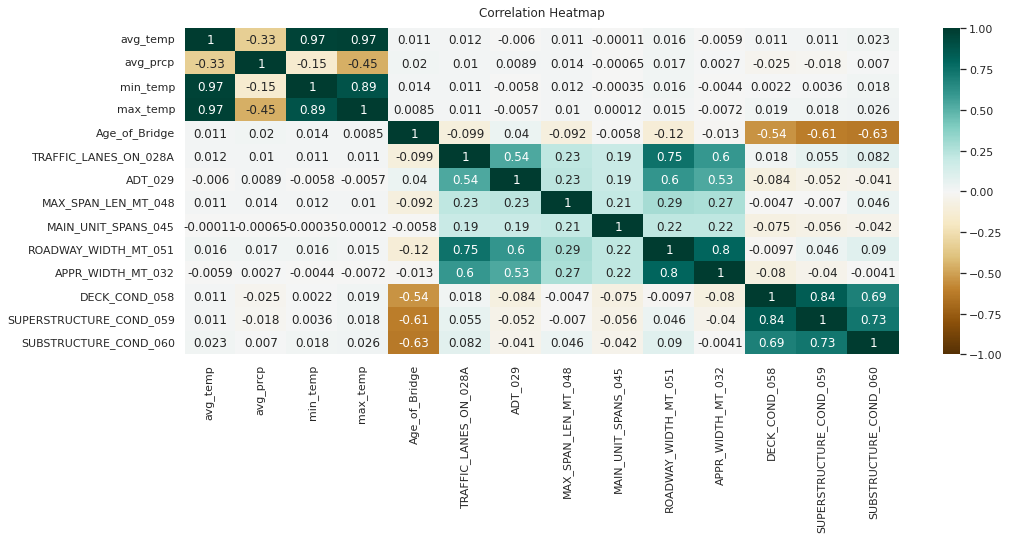

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df3_IL.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
np.triu(np.ones_like(df3_IL.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

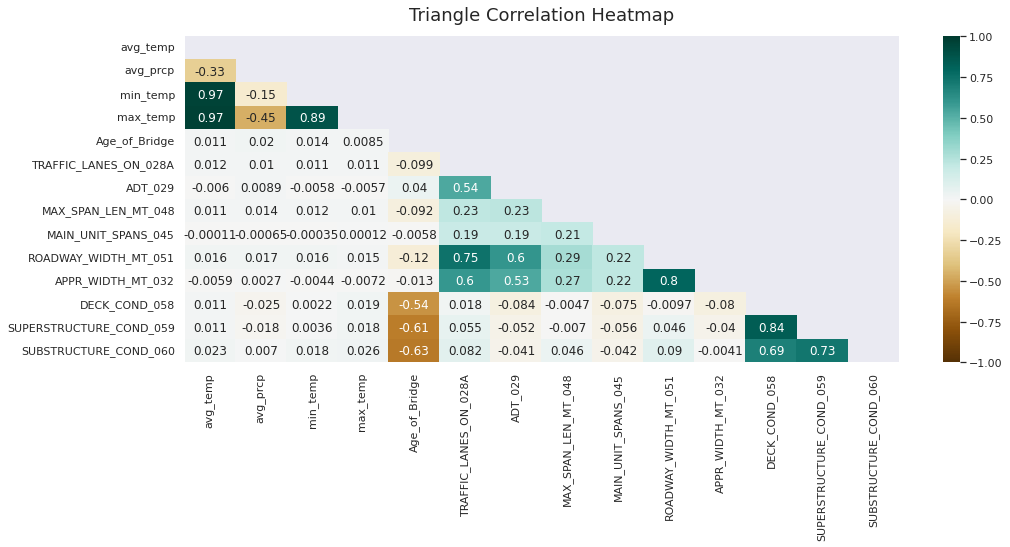

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df3_IL.corr(), dtype=np.bool))
heatmap = sns.heatmap(df3_IL.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

**Visualization of Current Deck and Superstructure Materials**

In [ ]:
#Visualizing current deck structure parameters
#Deck structure type is 106,wearing surface is 107,membrane type is 108,deck protection is 109
Vis=pd.read_csv("Datafor555/IL/IL20.csv")
Vis.iloc[:,106]
#Importer not working will check later

UnicodeDecodeError: ignored